This code aims to classify text messages as smishing or ham. For doing the same, a model has been trained on a labeled dataset with 640 smishing entries and 4874 ham entries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical

In [25]:
data = pd.read_csv('/content/SMS.csv')

data['LABEL'] = data['LABEL'].map({'Smishing': 1, 'ham': 0})
data.dropna(subset=['LABEL'], inplace=True)
data.reset_index(drop=True, inplace=True)
X = data['TEXT']
y = data['LABEL']
print(y.unique())

[0. 1.]


This shows the number of smishing entries

In [9]:
print(len(data[data['LABEL']==1]))

640


This shows the number of ham entries

In [10]:
print(len(data[data['LABEL']==0]))

4874


The dataset has text messages. Hence, all the text has been tokenised and encoded into categorical data

In [24]:
max_words = 10000
max_length = 200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=max_length)
y_categorical = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=42)

embedding_dim = 100
filters = 128
kernel_size = 5

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 100)          1000000   
                                                                 
 conv1d_1 (Conv1D)           (None, 196, 128)          64128     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 98, 128)           0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                125450    
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                      

The model has been trained for 10 epochs, accuracy and loss are tracked at every epoch

In [4]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
69/69 [==============================] - 13s 140ms/step - loss: 0.2656 - accuracy: 0.8703 - val_loss: 0.1223 - val_accuracy: 0.9846
Epoch 2/10
69/69 [==============================] - 11s 161ms/step - loss: 0.0930 - accuracy: 0.9916 - val_loss: 0.1112 - val_accuracy: 0.9864
Epoch 3/10
69/69 [==============================] - 11s 160ms/step - loss: 0.0781 - accuracy: 0.9980 - val_loss: 0.1060 - val_accuracy: 0.9882
Epoch 4/10
69/69 [==============================] - 12s 168ms/step - loss: 0.0707 - accuracy: 0.9980 - val_loss: 0.0960 - val_accuracy: 0.9891
Epoch 5/10
69/69 [==============================] - 9s 136ms/step - loss: 0.0646 - accuracy: 0.9989 - val_loss: 0.0978 - val_accuracy: 0.9891
Epoch 6/10
69/69 [==============================] - 13s 183ms/step - loss: 0.0592 - accuracy: 0.9989 - val_loss: 0.0987 - val_accuracy: 0.9891
Epoch 7/10
69/69 [==============================] - 18s 266ms/step - loss: 0.0549 - accuracy: 0.9986 - val_loss: 0.0943 - val_accuracy: 0.9882


In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This code prints the confusion matrix for the trained model using the test data and it can be seen that the model performs well

35/35 [==============================] - 2s 48ms/step


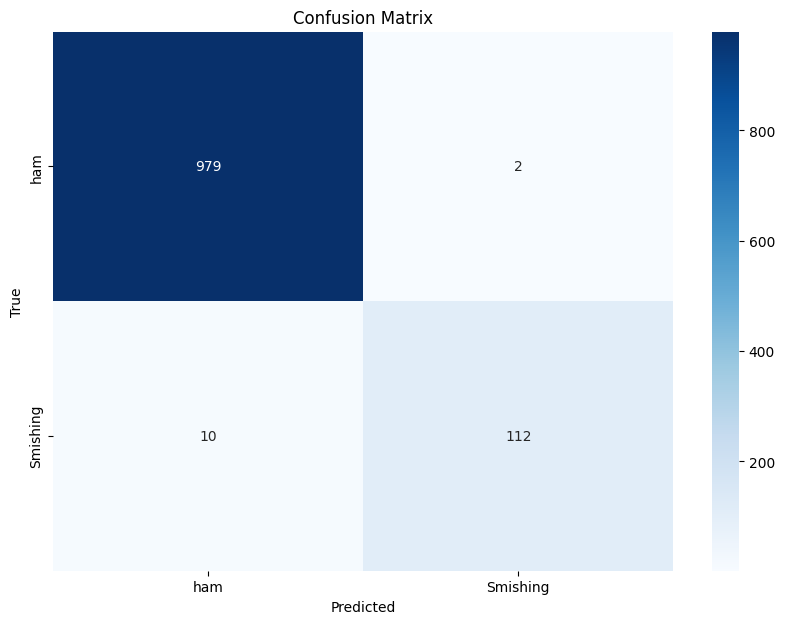

In [23]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'Smishing'], yticklabels=['ham', 'Smishing'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

A testing accuracy of 98.91% has been obtained as has been considered as a satisfactory value.

In [17]:
accuracy = accuracy_score(y_true, y_pred)
print(f'Testing Accuracy: {accuracy:.4f}')

Testing Accuracy: 0.9891


In [12]:
import numpy as np
from keras.models import load_model
loaded_model = model

Various test cases have been taken to evaluate the model's performance by considering the prediction given by the model

In [22]:
new_message = "collect your lottery of 2500000 here immediately. Click on this link"
new_message_sequence = tokenizer.texts_to_sequences([new_message])
new_message_padded = pad_sequences(new_message_sequence, maxlen=max_length)

prediction = loaded_model.predict(new_message_padded)
print(prediction)
predicted_label = np.argmax(prediction)
print(predicted_label)

label_mapping = {0: 'ham', 1: 'Smishing'}
predicted_class = label_mapping[predicted_label]

print(f"The model classifies the message as: '{predicted_class}'")

1/1 [==============================] - 0s 36ms/step
[[0.29224315 0.70775676]]
1
The model classifies the message as: 'Smishing'


In [21]:
new_message = "Heyy! How are you doing?"
new_message_sequence = tokenizer.texts_to_sequences([new_message])
new_message_padded = pad_sequences(new_message_sequence, maxlen=max_length)

prediction = loaded_model.predict(new_message_padded)
print(prediction)
predicted_label = np.argmax(prediction)
print(predicted_label)

label_mapping = {0: 'ham', 1: 'Smishing'}
predicted_class = label_mapping[predicted_label]

print(f"The model classifies the message as: '{predicted_class}'")

1/1 [==============================] - 0s 89ms/step
[[9.9999046e-01 9.5911164e-06]]
0
The model classifies the message as: 'ham'


This is a special test case where a message in Hindi has been used and still gets clssified as smishing

In [20]:
new_message = "Bank ke dwara jeeta hua lottery collect karnekeliye turant ye link pe click kare "

new_message_sequence = tokenizer.texts_to_sequences([new_message])
new_message_padded = pad_sequences(new_message_sequence, maxlen=max_length)

prediction = loaded_model.predict(new_message_padded)
print(prediction)
predicted_label = np.argmax(prediction)
print(predicted_label)

label_mapping = {0: 'ham', 1: 'Smishing'}
predicted_class = label_mapping[predicted_label]

print(f"The model classifies the message as: '{predicted_class}'")

1/1 [==============================] - 0s 36ms/step
[[0.36773425 0.63226575]]
1
The model classifies the message as: 'Smishing'
